In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
print(f'Accuracy on test set: {classifier.score(X_test, y_test)}')
print(f'Accuracy on train set: {classifier.score(X_train, y_train)}')

Accuracy on test set: 0.93
Accuracy on train set: 1.0


In [6]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


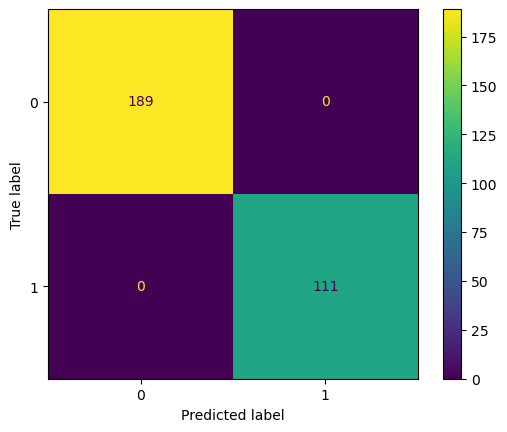

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_train, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.gca().grid(False)

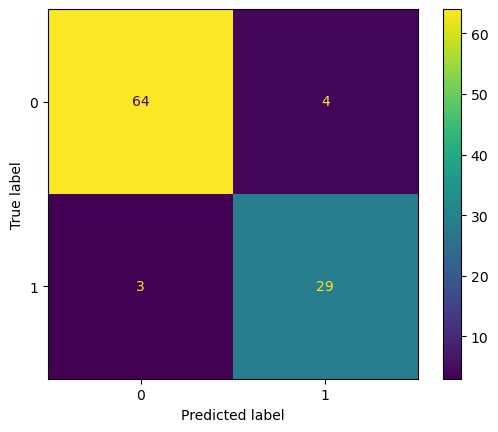

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.gca().grid(False)

In [ ]:
from joblib import Parallel, delayed
from matplotlib.colors import ListedColormap
# Tạo lưới dữ liệu để vẽ đồ thị
X_set, y_set = sc.inverse_transform(X_train), y_train
step_size = 0.25 # Điều chỉnh bước nhảy để cân bằng tốc độ và độ mịn
margin = 5 # Điều chỉnh lề để giới hạn phạm vi của lưới
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.1))

# Hàm dự đoán cho một phần của lưới
def predict_chunk(chunk):
  return classifier.predict(sc.transform(chunk))

# Chia lưới dữ liệu thành các phần nhỏ
n_jobs = 29  # Sử dụng tất cả các lõi CPU
chunks = np.array_split(np.array([X1.ravel(), X2.ravel()]).T, n_jobs)

# Thực hiện dự đoán song song trên các phần
results = Parallel(n_jobs=n_jobs)(delayed(predict_chunk)(chunk) for chunk in chunks)

# Kết hợp kết quả
predictions = np.concatenate(results)

# Vẽ đồ thị
plt.contourf(X1, X2, predictions.reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from joblib import Parallel, delayed
from matplotlib.colors import ListedColormap
# Tạo lưới dữ liệu để vẽ đồ thị
X_set, y_set = sc.inverse_transform(X_test), y_test
step_size = 0.25 # Điều chỉnh bước nhảy để cân bằng tốc độ và độ mịn
margin = 5 # Điều chỉnh lề để giới hạn phạm vi của lưới
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.1))

# Hàm dự đoán cho một phần của lưới
def predict_chunk(chunk):
  return classifier.predict(sc.transform(chunk))

# Chia lưới dữ liệu thành các phần nhỏ
n_jobs = 29  # Sử dụng tất cả các lõi CPU
chunks = np.array_split(np.array([X1.ravel(), X2.ravel()]).T, n_jobs)

# Thực hiện dự đoán song song trên các phần
results = Parallel(n_jobs=n_jobs)(delayed(predict_chunk)(chunk) for chunk in chunks)

# Kết hợp kết quả
predictions = np.concatenate(results)

# Vẽ đồ thị
plt.contourf(X1, X2, predictions.reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()